### Batch normalization is performed to help with vanishing and exploding gradient issues.

This can be applied to any activation function and any weight initialization technique.

There are two methods to apply BN.

1. Before activation layers
2. Between layer and activation layers

In both the case the total new parameters introduced for BN layers will be same (wrightm bias, alpha, beta). Out of which alpha and beta are trainable parameters.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [3]:
f_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = f_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [4]:
X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255.
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255.

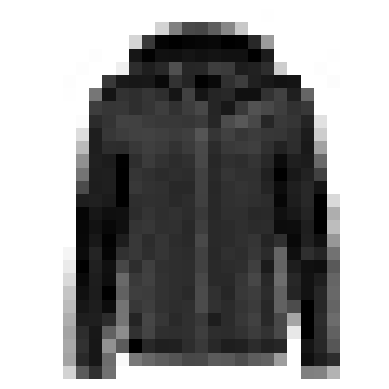

4

In [5]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()
y_train[0]

#### Model without BN

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


2023-07-12 15:08:47.486558: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-12 15:08:47.633747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.7299 - accuracy: 0.7594

2023-07-12 15:08:57.733996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 11s 6ms/step - loss: 0.7299 - accuracy: 0.7594 - val_loss: 0.4997 - val_accuracy: 0.8306
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4892 - accuracy: 0.8312 - val_loss: 0.4537 - val_accuracy: 0.8428
Epoch 3/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4435 - accuracy: 0.8442 - val_loss: 0.4117 - val_accuracy: 0.8622
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4141 - accuracy: 0.8550 - val_loss: 0.3880 - val_accuracy: 0.8696
Epoch 5/5
313/313 [==============================] - 1s 5ms/step - loss: 0.4262 - accuracy: 0.8525


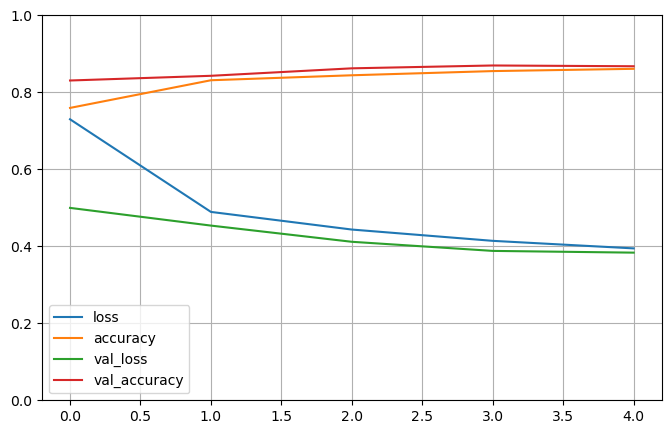

In [8]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]

model = tf.keras.models.Sequential(LAYERS)

model.layers

model.summary()

LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

model.evaluate(X_test, y_test)

pd.DataFrame(history.history)

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#### Batch normalization method 1 - Before activation function

In [9]:
LAYER_BN_ONE = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]

model2 = tf.keras.models.Sequential(LAYER_BN_ONE)

model2.summary()

784 * 4, 300 * 4, 100 * 4

BN_params = sum([784 * 4, 300 * 4, 100 * 4])
BN_params

Trainable_BN_params = sum([784 * 4, 300 * 4, 100 * 4])/2
Trainable_BN_params ## Gamma, Beta

Non_Trainable_BN_params = BN_params - Trainable_BN_params
Non_Trainable_BN_params ## Mean, std deviation

LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model2.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history2 = model2.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

2023-07-12 15:12:50.350220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.5309 - accuracy: 0.8157

2023-07-12 15:13:08.762718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 20s 11ms/step - loss: 0.5309 - accuracy: 0.8157 - val_loss: 0.3789 - val_accuracy: 0.8642
Epoch 2/5
1719/1719 [==============================] - 18s 11ms/step - loss: 0.3888 - accuracy: 0.8617 - val_loss: 0.3431 - val_accuracy: 0.8768
Epoch 3/5
1719/1719 [==============================] - 18s 11ms/step - loss: 0.3501 - accuracy: 0.8744 - val_loss: 0.3379 - val_accuracy: 0.8772
Epoch 4/5
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3234 - accuracy: 0.8830 - val_loss: 0.3243 - val_accuracy: 0.8848
Epoch 5/5
1719/1719 [==============================] - 18s 11ms/step - loss: 0.3044 - accuracy: 0.8892 - val_loss: 0.3190 - val_accuracy: 0.8904


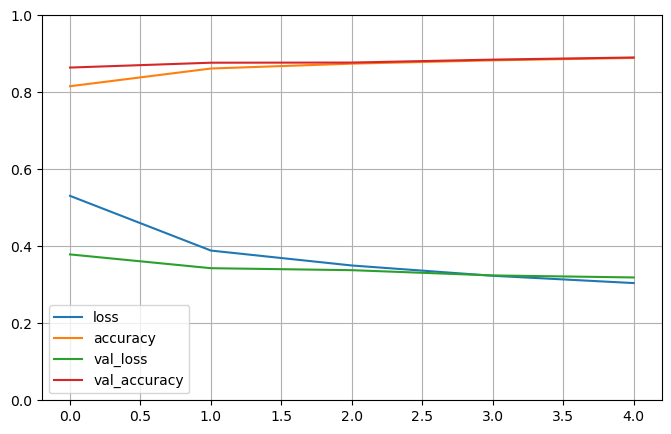

In [10]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Batch normalization method 2 - between dense layer and activation layer

In [ ]:
LAYER_BN_TWO = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation("relu"),
          tf.keras.layers.Dense(100, name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation("relu"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]

model3 = tf.keras.models.Sequential(LAYER_BN_TWO)

BN_layer_1 = model3.layers[1]
BN_layer_1

for variable in BN_layer_1.variables:
  print(variable.name, variable.trainable)

model3.summary()

LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model3.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history3 = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

batch_normalization_6/gamma:0 True
batch_normalization_6/beta:0 True
batch_normalization_6/moving_mean:0 False
batch_normalization_6/moving_variance:0 False
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_7 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   

In [ ]:
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()